# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:


In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers , optimizers

In [35]:
df= pd.read_csv("compresive_strength_concrete.csv")

In [36]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [37]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [38]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [40]:
df.keys()# to gets columns name

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [41]:
# split dataframe into input and output
data=df.iloc[:,:8]

targets=df.iloc[:,-1]

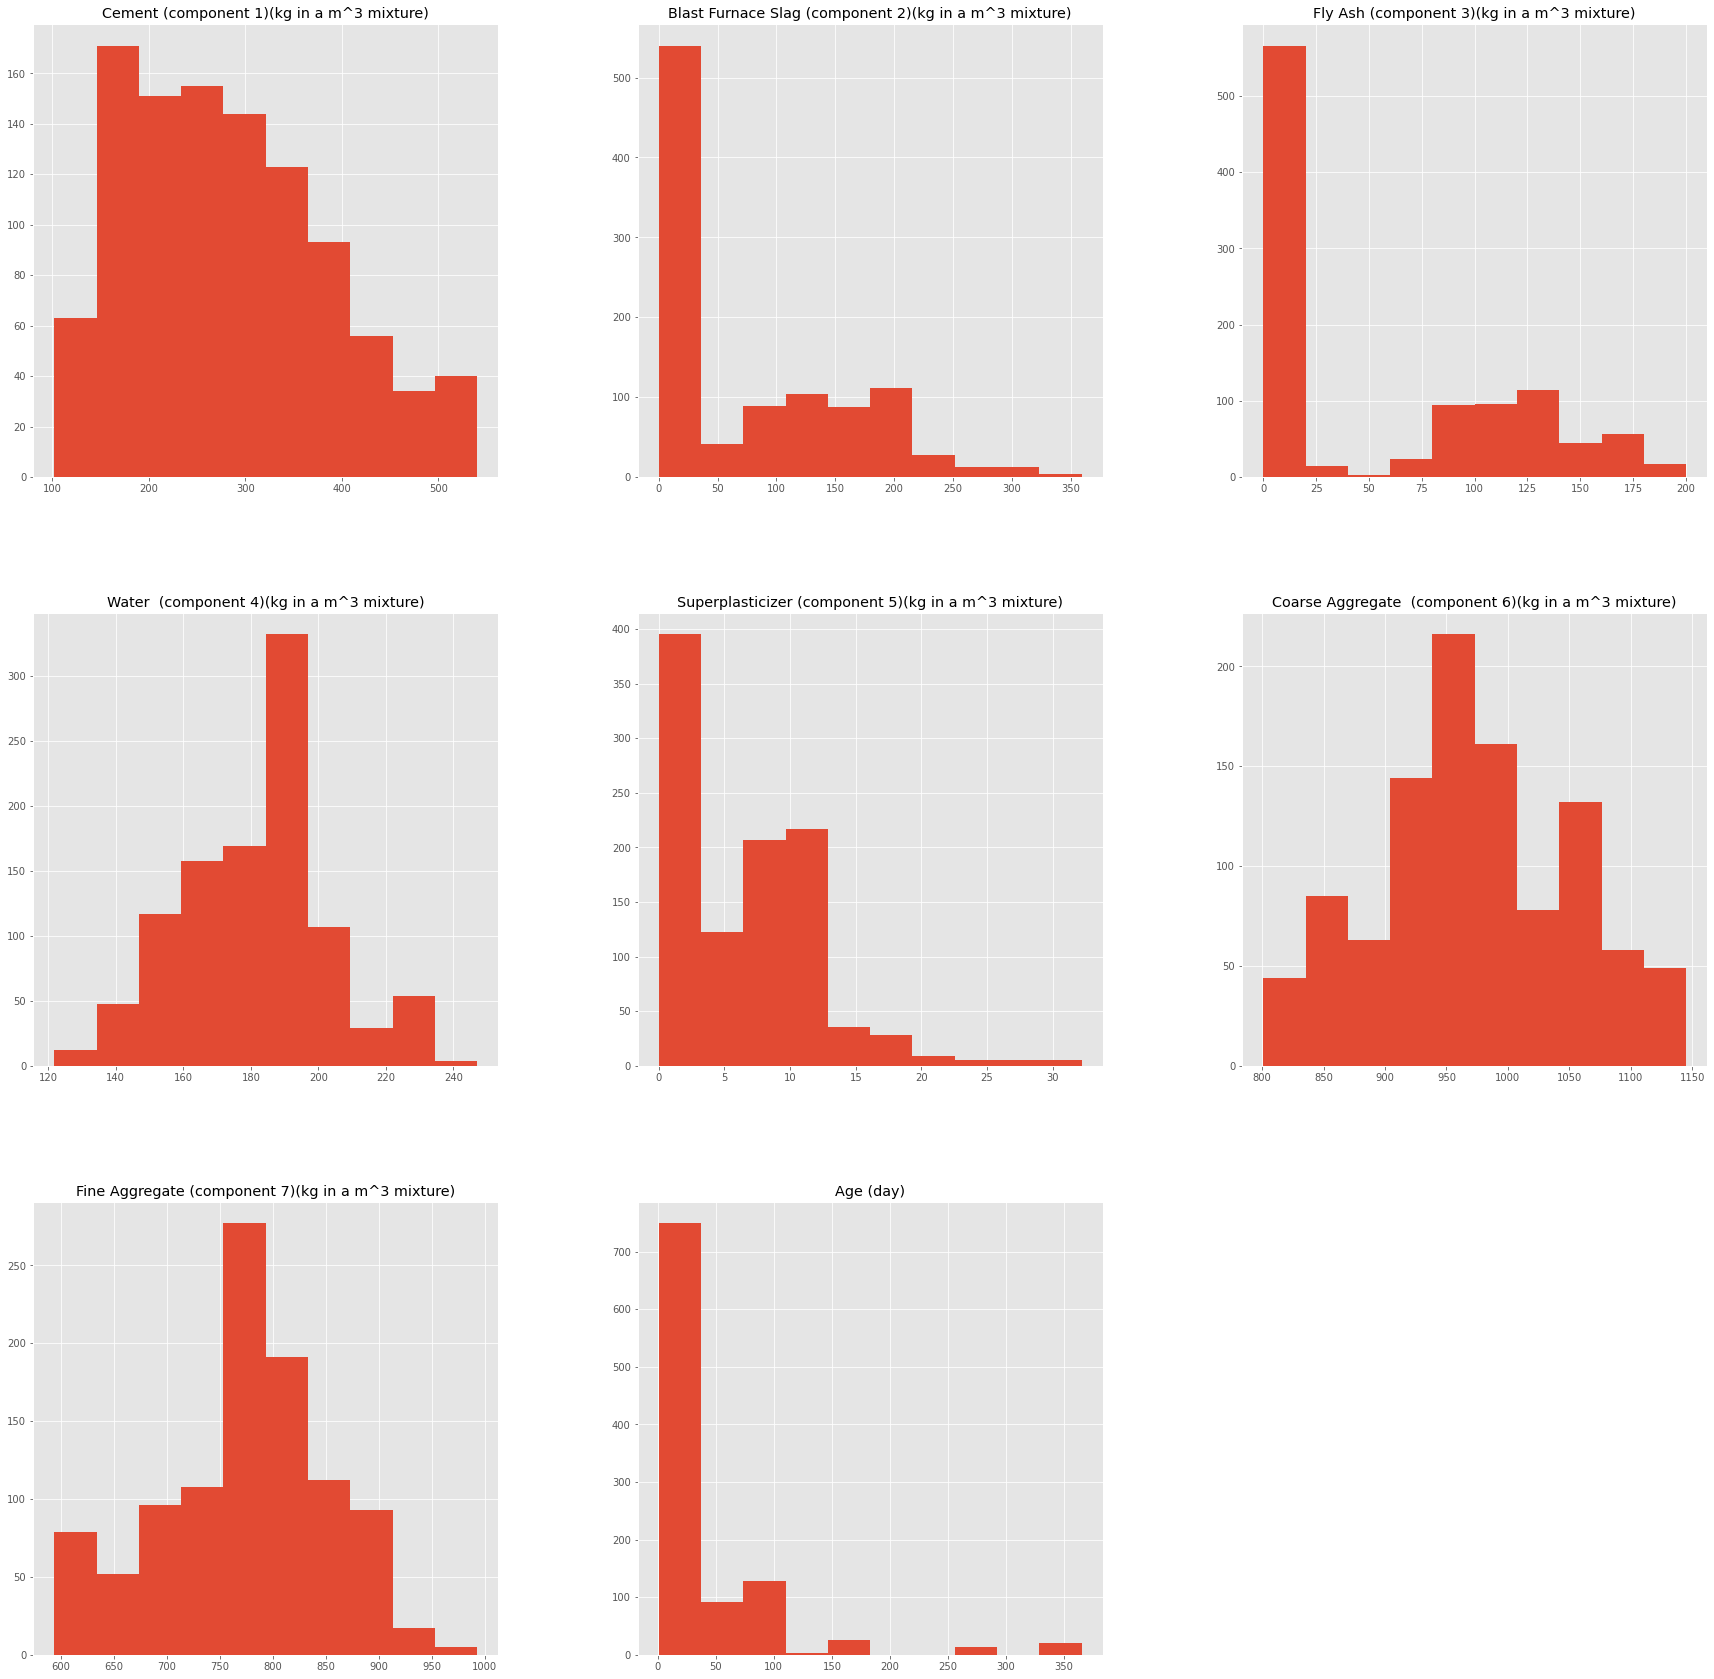

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.DataFrame.hist(data, figsize = [30,30])
plt.show()

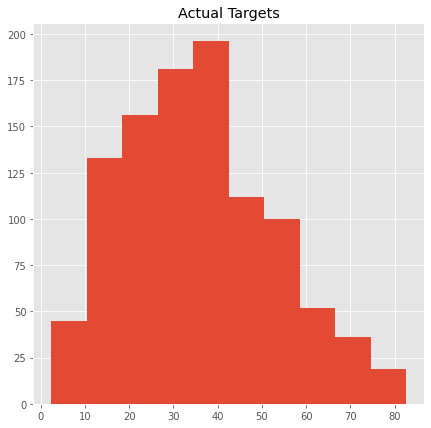

In [43]:
plt.style.use('ggplot')
targets.hist( figsize = [7,7])
plt.title("Actual Targets")
plt.show()

In [44]:
# standardized or normalized the data (input variables)
mean = data.mean(axis=0)
data-= mean
std = data.std(axis=0)
data/= std

In [45]:
# data spliting using machine learning spliting method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,targets,random_state=0)

In [46]:
print(f"Shape of training data :{X_train.shape},\nShape of training targets:{y_train.shape}")

Shape of training data :(772, 8),
Shape of training targets:(772,)


In [47]:
print(f"Shape of testing data :{X_test.shape},\nShape of testing targets:{y_test.shape}")

Shape of testing data :(258, 8),
Shape of testing targets:(258,)


In [48]:
X_train= np.asarray(X_train).astype('float32')
X_test= np.asarray(X_test).astype('float32')


In [49]:
val_X = X_train[:230]
partial_X_train=X_train[230:]
val_y=y_train[:230]
partial_y_train=y_train[230:]


In [50]:
from keras import models, layers , optimizers

In [51]:
network=models.Sequential()
network.add(tf.keras.layers.Dense(10,activation="relu",input_shape=(X_train.shape[1],)))
network.add(tf.keras.layers.Dense(8,activation="relu"))
network.add(tf.keras.layers.Dense(6,activation="relu"))
network.add(tf.keras.layers.Dense(1))


In [52]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [53]:
network.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="mse",metrics=['mae'])

In [54]:
history=network.fit(partial_X_train,partial_y_train,epochs=100,validation_data=(val_X,val_y),batch_size=1,verbose=1)

Epoch 1/100
542/542 [==============================] - 1s 2ms/step - loss: 1337.7100 - mae: 32.8071 - val_loss: 551.4061 - val_mae: 19.4126
Epoch 2/100
542/542 [==============================] - 1s 1ms/step - loss: 332.4442 - mae: 14.6889 - val_loss: 215.0333 - val_mae: 11.5066
Epoch 3/100
542/542 [==============================] - 1s 1ms/step - loss: 183.1750 - mae: 10.7917 - val_loss: 182.1339 - val_mae: 10.6160
Epoch 4/100
542/542 [==============================] - 1s 1ms/step - loss: 182.2379 - mae: 10.8196 - val_loss: 176.5588 - val_mae: 10.3372
Epoch 5/100
542/542 [==============================] - 1s 1ms/step - loss: 164.7417 - mae: 10.2962 - val_loss: 167.2432 - val_mae: 10.6317
Epoch 6/100
542/542 [==============================] - 1s 1ms/step - loss: 149.5698 - mae: 9.8264 - val_loss: 154.5211 - val_mae: 10.0844
Epoch 7/100
542/542 [==============================] - 1s 1ms/step - loss: 140.6775 - mae: 9.3967 - val_loss: 149.1830 - val_mae: 9.8813
Epoch 8/100
542/542 [========

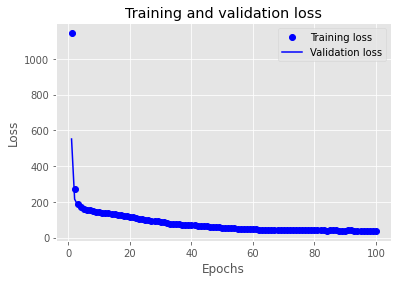

In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
all_mae_histories=[]
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)
print(all_mae_histories)

[[19.41262435913086, 11.506553649902344, 10.615972518920898, 10.337181091308594, 10.631683349609375, 10.084441184997559, 9.881331443786621, 9.632811546325684, 9.514350891113281, 9.380221366882324, 9.262978553771973, 9.599615097045898, 9.397990226745605, 9.137332916259766, 9.082476615905762, 8.801859855651855, 9.181339263916016, 8.733016967773438, 8.493545532226562, 8.333755493164062, 8.373648643493652, 8.112921714782715, 8.158950805664062, 7.77959680557251, 7.7617621421813965, 7.901955604553223, 7.407886505126953, 7.22373628616333, 7.393070697784424, 7.073937892913818, 6.832466125488281, 6.776525497436523, 6.700617790222168, 6.72495698928833, 6.6693620681762695, 6.541415214538574, 6.55711030960083, 6.410000324249268, 6.348920822143555, 6.434919357299805, 6.217913627624512, 6.334003448486328, 6.019477844238281, 5.97441291809082, 6.0822434425354, 5.795517921447754, 5.7645111083984375, 5.654908657073975, 5.7241315841674805, 5.586026668548584, 5.303504943847656, 5.558824062347412, 5.494756

In [57]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(2)]
print(average_mae_history)

[19.41262435913086, 11.506553649902344]


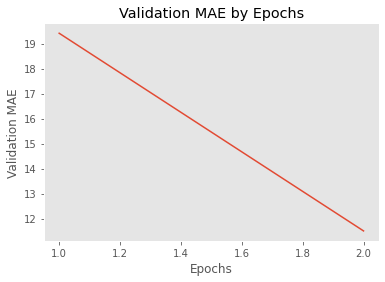

In [58]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE by Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid()
plt.show()

In [59]:
test_mse_score, test_mae_score = network.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 43.1998 - mae: 4.6785


In [60]:
 test_mae_score

4.678529262542725

In [61]:
y_pred = network.predict(X_test)
y_pred

array([[26.991642 ],
       [13.110714 ],
       [72.67483  ],
       [59.55909  ],
       [ 7.638341 ],
       [48.80372  ],
       [59.550526 ],
       [20.275959 ],
       [67.320786 ],
       [39.0683   ],
       [19.727106 ],
       [50.390446 ],
       [33.50877  ],
       [16.03943  ],
       [56.168674 ],
       [58.580524 ],
       [37.38611  ],
       [32.182533 ],
       [53.538506 ],
       [38.554623 ],
       [53.35543  ],
       [27.683535 ],
       [29.793955 ],
       [50.45653  ],
       [17.039213 ],
       [28.282227 ],
       [69.013374 ],
       [20.990263 ],
       [58.580524 ],
       [64.19785  ],
       [23.031168 ],
       [40.838673 ],
       [22.262705 ],
       [30.78071  ],
       [17.567942 ],
       [ 8.743632 ],
       [45.21808  ],
       [28.514984 ],
       [35.5713   ],
       [33.461674 ],
       [53.98309  ],
       [34.21602  ],
       [28.09104  ],
       [41.168243 ],
       [70.322    ],
       [39.39867  ],
       [26.760202 ],
       [39.28

In [62]:
y_test

747    26.06
718    10.35
175    79.30
828    74.99
713     9.69
       ...  
453    31.72
906    39.42
757    18.13
875    18.28
62      9.87
Name: Concrete compressive strength(MPa, megapascals) , Length: 258, dtype: float64

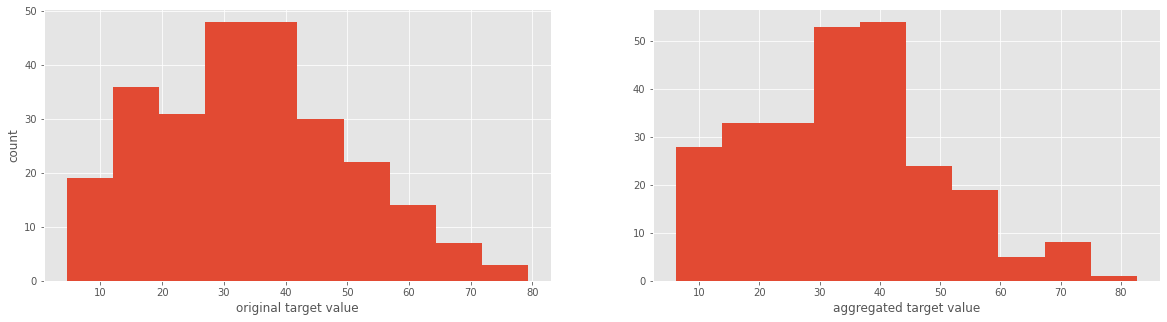

In [63]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test)
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y_pred)
plt.xlabel('aggregated target value')
plt.show()